In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq


La barriera di potenziale è :  0.005651403356481482


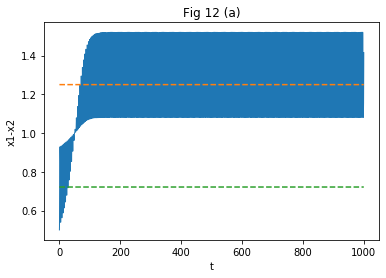

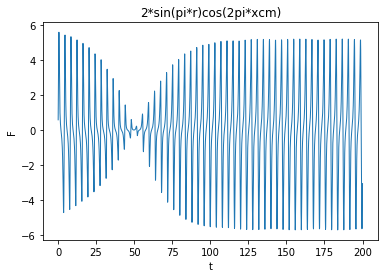

In [23]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_4.0__R_0.5__R2_0.7216878365__R3_1.25__c_0.01.dat"
                      ,sep=' ')
data = np.array(my_file)

R1 = 5*np.sqrt(3)/12
R2 = 1.25
c = 0.01
delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('Fig 12 (a)')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)

plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
#plt.xlim([0,0.2])
plt.show()


start=0
end=2000
#forza sin(r)cos(xcm)
y = -2*np.pi*np.sin(np.pi*(-data[start:end,2]+data[start:end,3]))*np.cos(np.pi*(data[start:end,2]+data[start:end,3]))

plt.xlabel('t')
plt.ylabel('F')
plt.title('2*sin(pi*r)cos(2pi*xcm)')
plt.plot(data[start:end,0], y, linewidth=1)
plt.show()

114.99490352883791


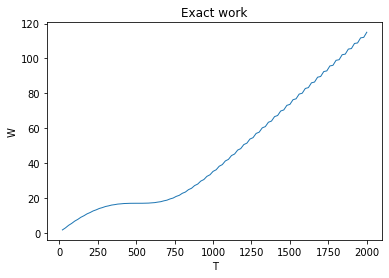

In [24]:
import scipy.integrate


#calcolo energia immessa
P = y*(-data[start:end,4]+data[start:end,5])
energy = scipy.integrate.trapz(P, data[start:end,0])
print(energy)
spaces = np.arange(100)
e1 = np.zeros(100)

for i in spaces:
    term = int(start + (i+1)*(end-start)/len(spaces))
    e1[i] = scipy.integrate.trapz(P[:int((i+1)*(end-start)/len(spaces))], data[start:term,0])
    
term = start + (spaces+1)*(end-start)/len(spaces)
plt.xlabel('T')
plt.ylabel('W')
plt.title('Exact work')
plt.plot(term,e1,linewidth=1)

plt.show()

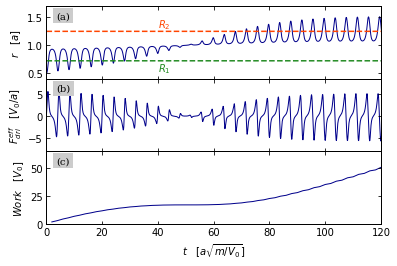

In [25]:
R1 = 5*np.sqrt(3)/12
R2 = 1.25
c = 0.01
import matplotlib.transforms as mtransforms

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax1.plot(data[:,0], r , label='$x_2-x_1$', color ='darkblue',linewidth=1)
ax1.plot(data[:,0], R2*np.ones(len(data[:,0])),'orangered', label='$R_2$',linestyle='dashed')
ax1.plot(data[:,0], R1*np.ones(len(data[:,0])), 'forestgreen',label='$R_1$',linestyle='dashed')
ax1.text(40, 1.33, '$R_2$',color='orangered')
ax1.text(40, 0.53, '$R_1$', color='forestgreen')
ax1.set(ylabel='$r \quad [a]$',ylim=[0.4,1.7])

ax1R = ax1.twinx()
ax1T = ax1.twiny()
ax1.tick_params(direction='in')
ax1T.tick_params(direction='in')
ax1R.tick_params(direction='in')
ax1R.yaxis.set_major_formatter(plt.NullFormatter())
ax1T.xaxis.set_major_formatter(plt.NullFormatter())
ax1R.set(ylim=[0.4,1.7])
ax1T.set(xlim=[0,120])

ax2.plot(data[start:end,0], y , color ='darkblue',linewidth=1)
ax2.set(ylabel=r'$F_{dri}^{eff} \quad [V_0/a]$',ylim=[-8,8.5])

ax2R = ax2.twinx()
ax2T = ax2.twiny()
ax2.tick_params(direction='in')
ax2T.tick_params(direction='in')
ax2R.tick_params(direction='in')
ax2R.yaxis.set_major_formatter(plt.NullFormatter())
ax2T.xaxis.set_major_formatter(plt.NullFormatter())
ax2R.set(xlim=[0,120])
ax2T.set(xlim=[0,120])
ax2R.set(ylim=[-8,8.5])


ax3.plot(term/10, e1 ,  color ='darkblue',linewidth=1)
ax3.set(ylabel='$Work \quad [V_0]$',ylim=[0,65])

ax3R = ax3.twinx()
ax3T = ax3.twiny()
ax3.tick_params(direction='in')
ax3T.tick_params(direction='in')
ax3R.tick_params(direction='in')
ax3R.yaxis.set_major_formatter(plt.NullFormatter())
ax3T.xaxis.set_major_formatter(plt.NullFormatter())
ax3R.set(ylim=[0,65])
ax3T.set(xlim=[0,120])


trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.0, 1.0, '(a)', transform=ax1.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))
ax2.text(0.0, 1.0, '(b)', transform=ax2.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))
ax3.text(0.0, 1.0, '(c)', transform=ax3.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))


ax3.set(xlabel='$t \quad [ a\sqrt{m/V_0} ] $')
plt.subplots_adjust(wspace=0, hspace=0)
plt.xlim([0,120])
plt.savefig("12_a.pdf", dpi=300, bbox_inches='tight')
plt.savefig("12_a.png", dpi=300, bbox_inches='tight')
plt.show()


La velocità del centro di massa è :  0.2518023236418611
La frequenza armonica in un intorno di R2 è :  0.0994718394324346
La barriera di potenziale è :  0.005651403356481482


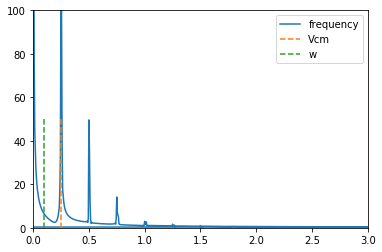

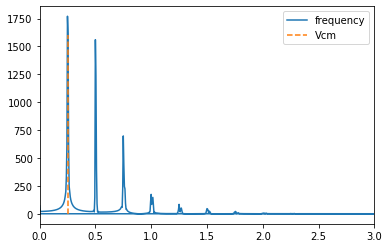

In [26]:


vcm = np.mean(data[start:end,4]+data[start:end,5])/2
print('La velocità del centro di massa è : ' , vcm)

w = pow(12*c*(pow(R2,4) - pow(R2,2)*pow(R1,2))*2, 1/2)/(2*np.pi)
print('La frequenza armonica in un intorno di R2 è : ' ,w)

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

R = fft(r[start:end])
freqr = fftfreq(end-start)*10
plt.plot(freqr, np.abs(R),label='frequency')
plt.plot([vcm,vcm],[0,50],label='Vcm',linestyle='dashed')
plt.plot([w,w],[0,50],label='w',linestyle='dashed')
plt.legend()
plt.xlim([0,3])
plt.ylim([0,100])
plt.show()

Y = fft(y)
freqr = fftfreq(len(y))*10
plt.plot(freqr, np.abs(Y),label='frequency')
plt.plot([vcm,vcm],[0,1600],label='Vcm',linestyle='dashed')
plt.legend()
plt.xlim([0,3])
plt.show()


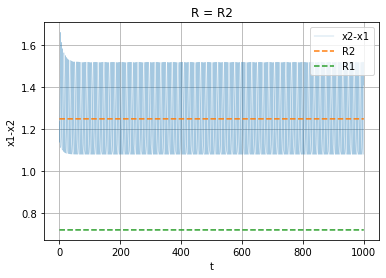

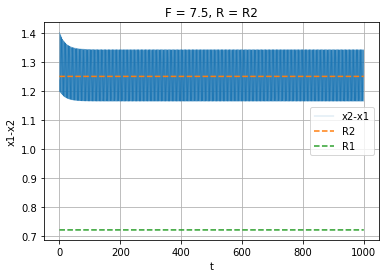

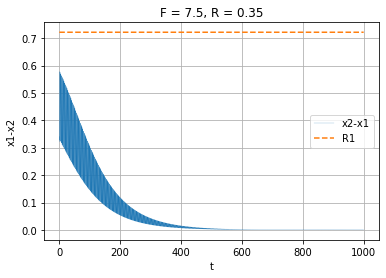

In [27]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_4.0__R_1.25__R2_0.7216878365__R3_1.25__c_0.01.dat"
                      ,sep=' ')
data = np.array(my_file) 
plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.2)
plt.grid()
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], (5*np.sqrt(3)/12)*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.show()


my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_0.7216878365__R3_1.25__c_0.01.dat"
                      ,sep=' ')
data = np.array(my_file) 
plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.2)
plt.grid()
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], (5*np.sqrt(3)/12)*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.show()


my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_0.35__R2_0.7216878365__R3_1.25__c_0.01.dat"
                      ,sep=' ')
data = np.array(my_file) 
plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, R = 0.35')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.2)
plt.grid()
#plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], (5*np.sqrt(3)/12)*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.show()

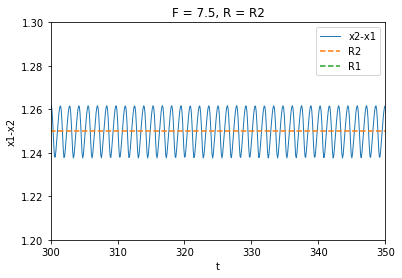

La velocità del centro di massa è :  0.7211499373384201
La frequenza armonica in un intorno di R2 è :  3.14557575653044
La barriera di potenziale è :  5.651403356481481


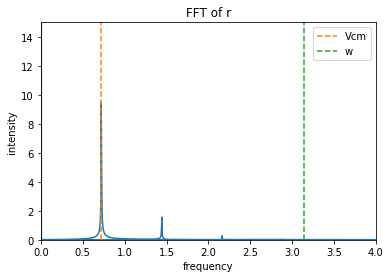

In [28]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_0.7216878365__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 5*np.sqrt(3)/12
R2 = 1.25
c = 10

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], (5*np.sqrt(3)/12)*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.ylim([1.2,1.3])
plt.xlim([300,350])
plt.show()


y = -2*np.pi*np.sin(np.pi*(-data[start:end,2]+data[start:end,3]))*np.cos(np.pi*(data[start:end,2]+data[start:end,3]))

vcm = np.mean(data[start:end,4]+data[start:end,5])/2
print('La velocità del centro di massa è : ' , vcm)

w = pow(12*c*(pow(R2,4) - pow(R2,2)*pow(R1,2))*2, 1/2)/(2*np.pi)
print('La frequenza armonica in un intorno di R2 è : ' ,w)

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

R = fft(r[start:end])
freqr = fftfreq(end-start)*10
plt.plot(freqr, np.abs(R))
plt.plot([vcm,vcm],[0,50],label='Vcm',linestyle='dashed')
plt.plot([w,w],[0,50],label='w',linestyle='dashed')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('intensity')
plt.title('FFT of r')
plt.xlim([0,4])
plt.ylim([0,15])
plt.show()


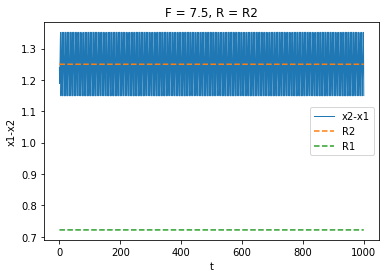

La velocità del centro di massa è :  0.1849915828865288
La frequenza armonica in un intorno di R2 è :  0.9947183943243458
La barriera di potenziale è :  0.5651403356481481


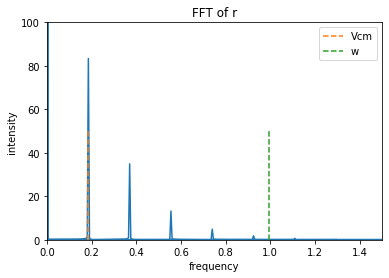

In [29]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_3.0__R_1.25__R2_0.7216878365__R3_1.25__c_1.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 5*np.sqrt(3)/12
R2 = 1.25
c = 1

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], (5*np.sqrt(3)/12)*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
#plt.ylim([1.2,1.3])
#plt.xlim([300,350])
plt.show()


y = -2*np.pi*np.sin(np.pi*(-data[start:end,2]+data[start:end,3]))*np.cos(np.pi*(data[start:end,2]+data[start:end,3]))

vcm = np.mean(data[start:end,4]+data[start:end,5])/2
print('La velocità del centro di massa è : ' , vcm)

w = pow(12*c*(pow(R2,4) - pow(R2,2)*pow(R1,2))*2, 1/2)/(2*np.pi)
print('La frequenza armonica in un intorno di R2 è : ' ,w)

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

R = fft(r[start:end])
freqr = fftfreq(end-start)*10
plt.plot(freqr, np.abs(R))
plt.plot([vcm,vcm],[0,50],label='Vcm',linestyle='dashed')
plt.plot([w,w],[0,50],label='w',linestyle='dashed')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('intensity')
plt.title('FFT of r')
plt.xlim([0,1.5])
plt.ylim([0,100])
plt.show()


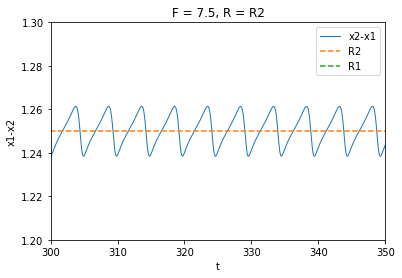

La velocità del centro di massa è :  0.20156211552485004
La frequenza armonica in un intorno di R2 è :  3.14557575653044
La barriera di potenziale è :  5.651403356481481


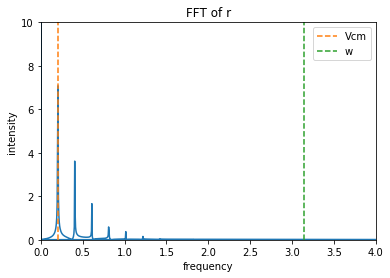

In [30]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_3.0__R_1.25__R2_0.7216878365__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 5*np.sqrt(3)/12
R2 = 1.25
c = 10

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], (5*np.sqrt(3)/12)*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.ylim([1.2,1.3])
plt.xlim([300,350])
plt.show()


y = -2*np.pi*np.sin(np.pi*(-data[start:end,2]+data[start:end,3]))*np.cos(np.pi*(data[start:end,2]+data[start:end,3]))

vcm = np.mean(data[start:end,4]+data[start:end,5])/2
print('La velocità del centro di massa è : ' , vcm)

w = pow(12*c*(pow(R2,4) - pow(R2,2)*pow(R1,2))*2, 1/2)/(2*np.pi)
print('La frequenza armonica in un intorno di R2 è : ' ,w)

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

R = fft(r[start:end])
freqr = fftfreq(end-start)*10
plt.plot(freqr, np.abs(R))
plt.plot([vcm,vcm],[0,50],label='Vcm',linestyle='dashed')
plt.plot([w,w],[0,50],label='w',linestyle='dashed')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('intensity')
plt.title('FFT of r')
plt.xlim([0,4])
plt.ylim([0,10])
plt.show()


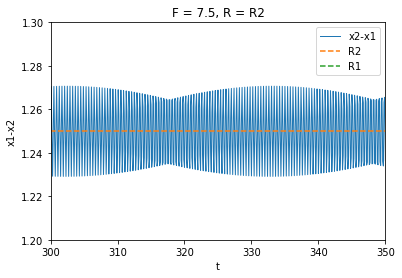

La velocità del centro di massa è :  2.4910017752774185
La frequenza armonica in un intorno di R2 è :  3.14557575653044
La barriera di potenziale è :  5.651403356481481


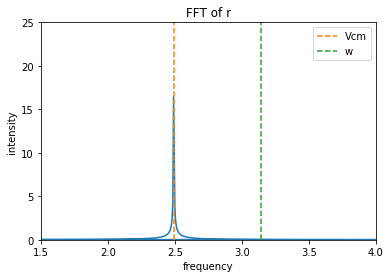

In [31]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_25.0__R_1.25__R2_0.7216878365__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 5*np.sqrt(3)/12
R2 = 1.25
c = 10

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], (5*np.sqrt(3)/12)*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.ylim([1.2,1.3])
plt.xlim([300,350])
plt.show()


y = -2*np.pi*np.sin(np.pi*(-data[start:end,2]+data[start:end,3]))*np.cos(np.pi*(data[start:end,2]+data[start:end,3]))

vcm = np.mean(data[start:end,4]+data[start:end,5])/2
print('La velocità del centro di massa è : ' , vcm)

w = pow(12*c*(pow(R2,4) - pow(R2,2)*pow(R1,2))*2, 1/2)/(2*np.pi)
print('La frequenza armonica in un intorno di R2 è : ' ,w)

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

R = fft(r[start:end])
freqr = fftfreq(end-start)*10
plt.plot(freqr, np.abs(R))
plt.plot([vcm,vcm],[0,50],label='Vcm',linestyle='dashed')
plt.plot([w,w],[0,50],label='w',linestyle='dashed')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('intensity')
plt.title('FFT of r')
plt.xlim([1.5,4])
plt.ylim([0,25])
plt.show()
